### Abstract:
***Heart disease is easier to treat when it is detected in the early stages.
    Machine learning techniques may aid a more efficient analysis in the prediction of the disease.
    Moreover, this prediction is one of the most central problems in medicine,
    as it is one of the leading diseases related to an unhealthy lifestyle.
    So, an early prediction of this disease will be useful for a cure or aversion.***
## Problem Statement:
***Analyze the heart disease dataset to explore the machine learning algorithms
    and build a decision tree model to predict the disease.***


## Dataset Information:
***Each attribute in the heart disease dataset is a medical risk factor***


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
data = pd.read_csv('HeartDisease.csv')

In [30]:
data

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Doing the EDA

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [32]:
data.isnull().sum()

age                    0
gender                 0
chest_pain             0
rest_bps               0
cholestrol             0
fasting_blood_sugar    0
rest_ecg               0
thalach                0
exer_angina            0
old_peak               0
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

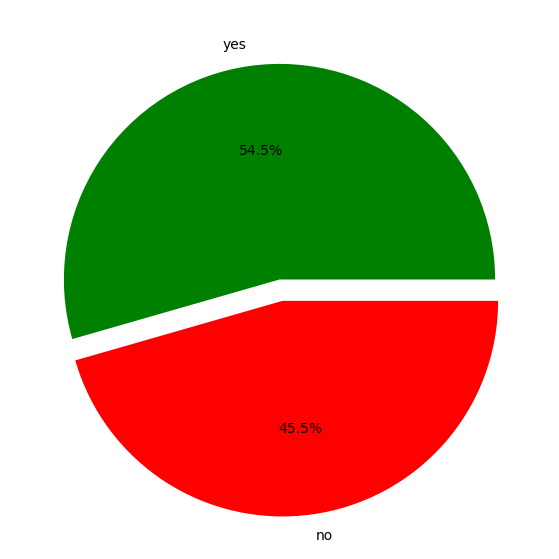

In [33]:
plt.figure(figsize = (13, 7))

sizes = data['target'].value_counts().values
labels = ['yes', 'no']
colors = ['Green', 'Red']
explode = [0, .1]

plt.pie(sizes, explode = explode, labels = labels, colors = colors, autopct = '%1.1f%%')
plt.show()

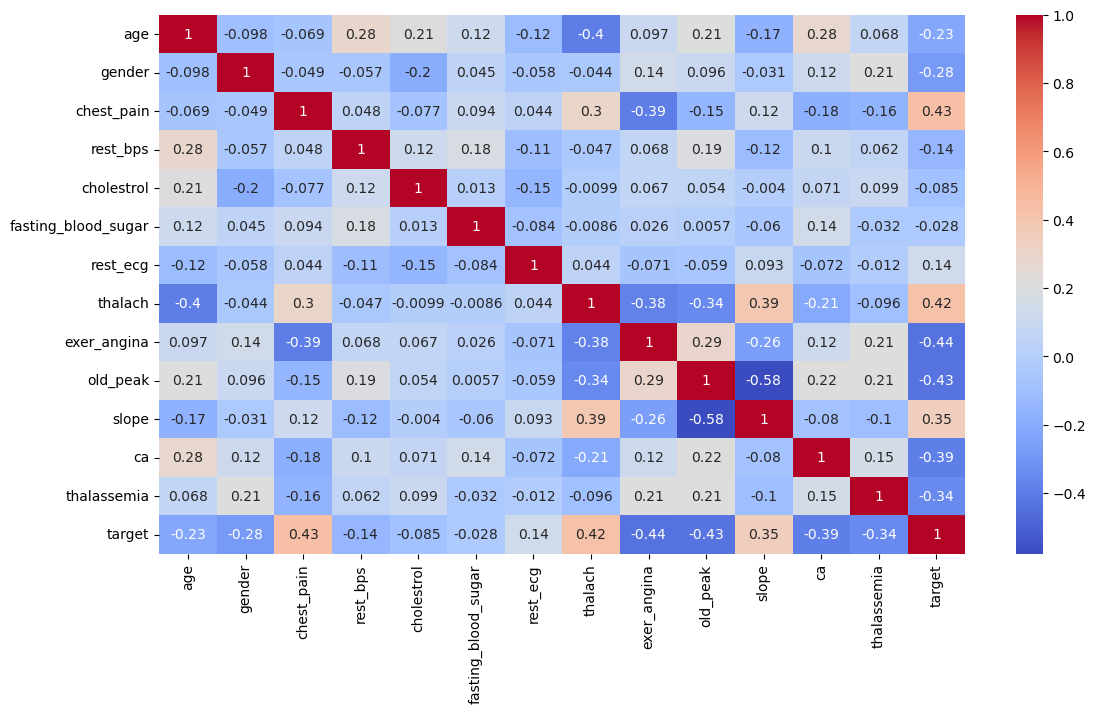

In [34]:
plt.figure(figsize = (13, 7))
sns.heatmap(data.corr(), annot = True, cmap = 'coolwarm')
plt.show()

In [35]:
data.columns

Index(['age', 'gender', 'chest_pain', 'rest_bps', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg', 'thalach', 'exer_angina', 'old_peak',
       'slope', 'ca', 'thalassemia', 'target'],
      dtype='object')

<Axes: xlabel='gender', ylabel='count'>

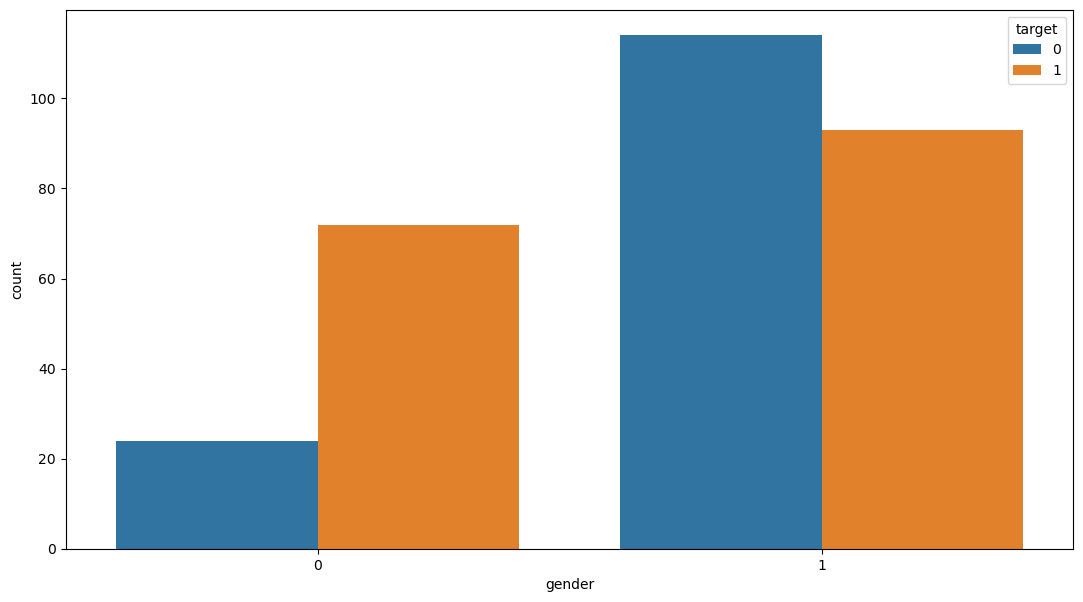

In [36]:
plt.figure(figsize=(13,7))
sns.countplot(x=data['gender'],hue=data['target'],data=data)

## 1=have heart disease 0=not have heart disease
## Gender of the patient - (0,1) - (Male, Female)
***from above we can see that the number of male heart disease is less than the number of female 
    male has approx=70 and female has approx=95 
    but in this we can also see that number of female member is high who don't have heart disease***

In [37]:
y=data['chest_pain']
x=data['cholestrol']

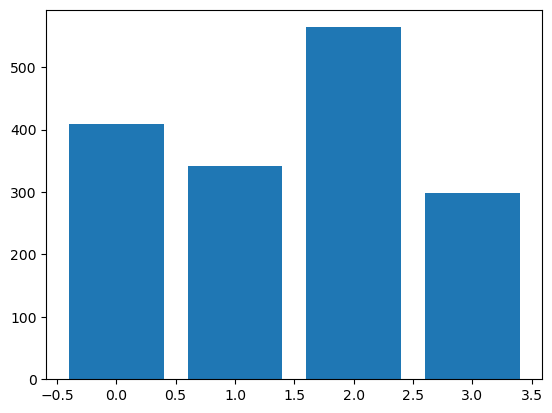

In [38]:
plt.bar(y,x)
plt.xlabel ="cholestrol"
plt.ylabel ="chest_pain"
plt.show()

<Axes: xlabel='cholestrol', ylabel='gender'>

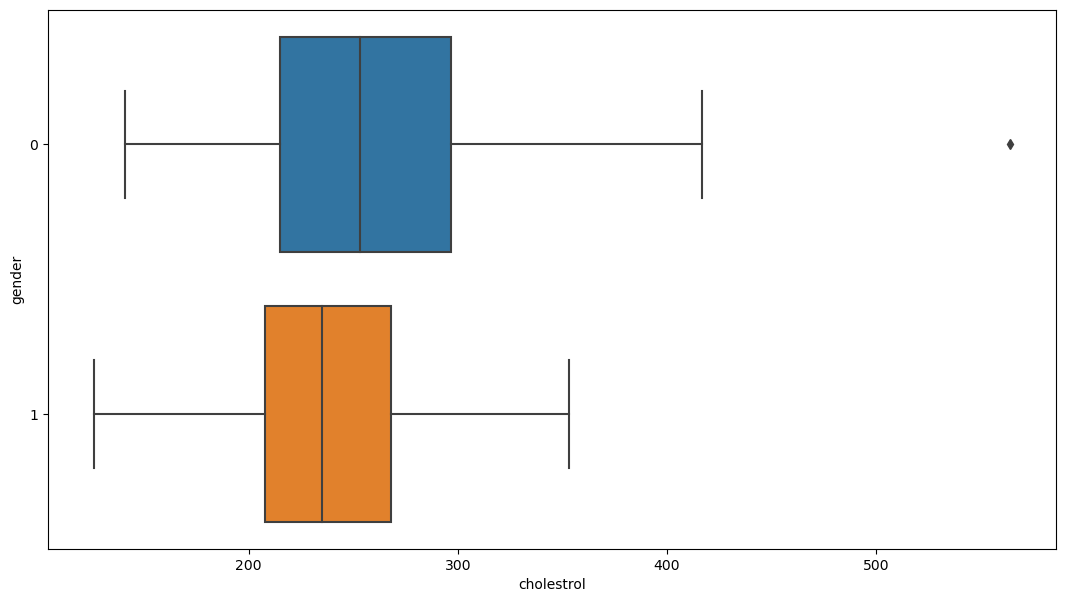

In [39]:
plt.figure(figsize=(13,7))
sns.boxplot(x=data['cholestrol'],y=data['gender'],orient='h')

## from above we can see that cholestrol level is high in male in respect to female

<Axes: xlabel='chest_pain', ylabel='gender'>

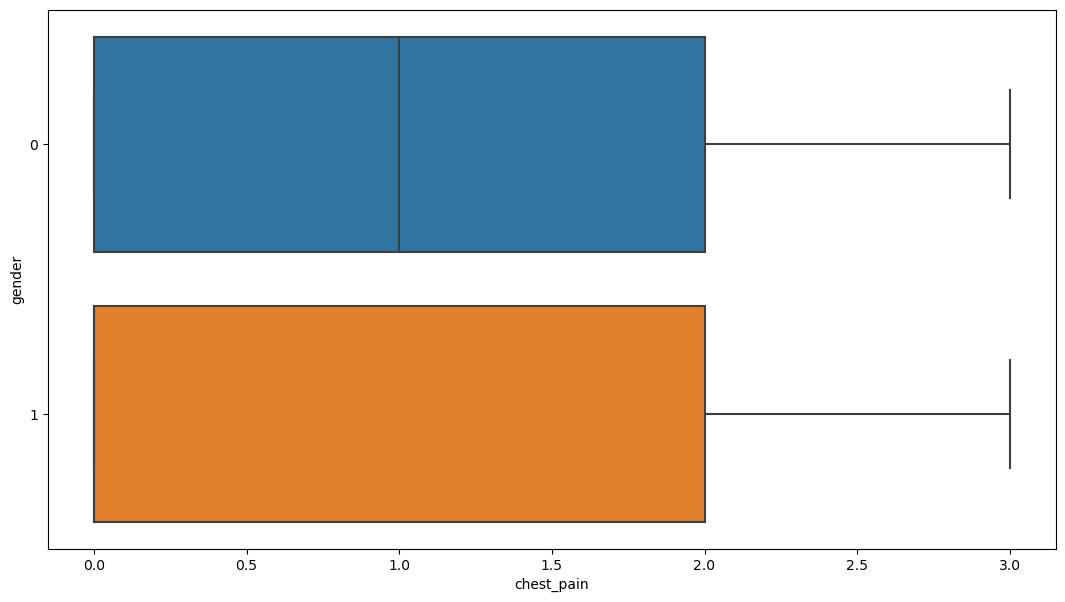

In [40]:
plt.figure(figsize=(13,7))
sns.boxplot(x=data['chest_pain'],y=data['gender'],orient='h')

## from this observation we can say that chest_pain is similar in both the gender 

## checking the chi2 for cleaning the data

In [41]:
from sklearn.feature_selection import chi2

In [42]:
x1 = data[['age', 'gender', 'chest_pain', 'rest_bps', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg', 'thalach', 'exer_angina', 'old_peak',
       'slope', 'ca', 'thalassemia']]

y1 = data['target']

In [43]:
score = chi2(x1,y1)
score

(array([ 23.28662399,   7.57683451,  62.59809791,  14.8239245 ,
         23.93639448,   0.20293368,   2.97827075, 188.32047169,
         38.91437697,  72.64425301,   9.8040952 ,  66.44076512,
          5.79185297]),
 array([1.39567266e-06, 5.91231763e-03, 2.53498179e-15, 1.18028642e-04,
        9.95714828e-07, 6.52363208e-01, 8.43893904e-02, 7.39510166e-43,
        4.42807388e-10, 1.55258340e-17, 1.74123685e-03, 3.60567663e-16,
        1.61006098e-02]))

In [44]:
p_values = pd.Series(score[1], index = x1.columns)
p_values

age                    1.395673e-06
gender                 5.912318e-03
chest_pain             2.534982e-15
rest_bps               1.180286e-04
cholestrol             9.957148e-07
fasting_blood_sugar    6.523632e-01
rest_ecg               8.438939e-02
thalach                7.395102e-43
exer_angina            4.428074e-10
old_peak               1.552583e-17
slope                  1.741237e-03
ca                     3.605677e-16
thalassemia            1.610061e-02
dtype: float64

In [45]:
irr_cols = []

for x in p_values.index:
    if p_values[x] <= 0.05:
        print(x, ':- Reject the Null Hypothesis')
    else:
        print(x, ':- Accept the Null Hypothesis')
        irr_cols.append(x)

age :- Reject the Null Hypothesis
gender :- Reject the Null Hypothesis
chest_pain :- Reject the Null Hypothesis
rest_bps :- Reject the Null Hypothesis
cholestrol :- Reject the Null Hypothesis
fasting_blood_sugar :- Accept the Null Hypothesis
rest_ecg :- Accept the Null Hypothesis
thalach :- Reject the Null Hypothesis
exer_angina :- Reject the Null Hypothesis
old_peak :- Reject the Null Hypothesis
slope :- Reject the Null Hypothesis
ca :- Reject the Null Hypothesis
thalassemia :- Reject the Null Hypothesis


In [46]:
data.drop(labels = irr_cols ,axis=1, inplace = True)

## spiliting Training the Model

In [47]:
## Data Split

X = data.drop('target', axis = 1)  #Features
y = data['target']                 #Target

In [48]:
# Split the data into train and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 32)

In [49]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 11), (61, 11), (242,), (61,))

In [50]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

In [51]:
# Fit the training data on DT Model
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [52]:
## Makes Prediction with the Model

pred = dt.predict(X_test)

## Model Evalution

In [53]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, confusion_matrix
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.81      0.73      0.77        30
           1       0.76      0.84      0.80        31

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



In [27]:
print("Accuracy Score: ", accuracy_score(y_test, pred))
print("F1 Score: ", f1_score(y_test, pred))
print("AUC Score: ", roc_auc_score(y_test, pred))

Accuracy Score:  0.7540983606557377
F1 Score:  0.7761194029850746
AUC Score:  0.7526881720430109


<Axes: >

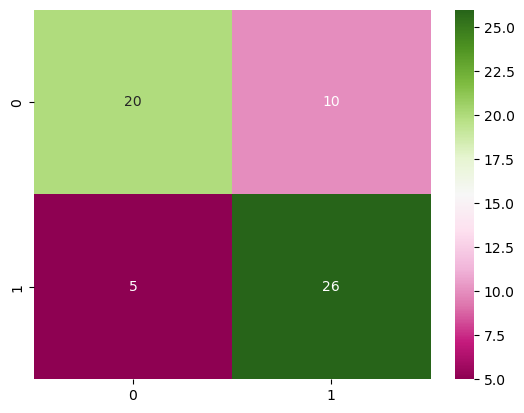

In [28]:
## Plot the confusion Matrix
sns.heatmap(confusion_matrix(y_test, pred), annot = True, cmap = 'PiYG')

## the score is around 80 we can increase the score by doing hyper-parameter tunning 

## Hyper-Parameter Tunning 

In [54]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [55]:
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(3, 50, 20)]

# Minimum number of samples required to split a node
min_samples_split = [5, 8, 10, 12, 15, 20, 30, 35, 40]

param_grid = {'max_depth': max_depth,
                'min_samples_split': min_samples_split,
              'criterion':['entropy', 'gini impurity']}

In [56]:
grid_model = GridSearchCV(dt, param_grid, cv = 3)

In [57]:
grid_model.fit(X_train, y_train)

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "D:\anaconda\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_par

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini impurity'],
                         'max_depth': [3, 5, 7, 10, 12, 15, 17, 20, 22, 25, 27,
                                       30, 32, 35, 37, 40, 42, 45, 47, 50],
                         'min_samples_split': [5, 8, 10, 12, 15, 20, 30, 35,
                                               40]})

In [58]:
grid_model.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=15)

In [59]:
grid_model.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 15}

In [76]:
dt_grid = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=15)

In [77]:
# Fit the training data on DT Model
dt_grid.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=15)

In [78]:
## Makes Prediction with the Model

pred_g = dt_grid.predict(X_test)

In [81]:
print(classification_report(y_test, pred_g))

              precision    recall  f1-score   support

           0       0.91      0.67      0.77        30
           1       0.74      0.94      0.83        31

    accuracy                           0.80        61
   macro avg       0.83      0.80      0.80        61
weighted avg       0.82      0.80      0.80        61



***after doing the hyper parameter tunning we get the score to 83 we can make it futher by manually checking the hyper parameter
    we can conclude that our model is approx 83% successfull*** 